In [1]:
import requests
import json
import pandas as pd
import time
%pylab inline

# TensorBoard is great but I want my data in jupyter!

tb_url = 'http://192.168.0.106:6006/data/scalars?run='
exp = '2016_10_01_13_18_21' # whatever you name your logs when you start the experiment
url = tb_url + exp +'&tag='

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_metrics = ['acc','loss','val_acc','val_loss']

In [3]:
j = [json.loads(requests.get(url+i).text) for i in all_metrics]

In [4]:
dfs = dict()
for idx,val in enumerate(all_metrics):
    df = pd.DataFrame(j[idx],index=None)
    df.columns = ['date','epoch',val]
    df.date = df.date.apply(lambda x: time.ctime(int(x)))
    dfs[val] = df

In [5]:
df2 = pd.concat(dfs.values(),axis=1)
df2 = df2.T.drop_duplicates().T

In [6]:
df2.head()

,date,epoch,acc,loss,val_acc,val_loss
0,Sat Oct 1 13:18:35 2016,0,0.5636,0.682983,0.574,0.679696
1,Sat Oct 1 13:18:46 2016,1,0.5684,0.681271,0.532,0.68878
2,Sat Oct 1 13:18:58 2016,2,0.5744,0.678132,0.562,0.681502
3,Sat Oct 1 13:19:09 2016,3,0.5702,0.681844,0.6,0.67545
4,Sat Oct 1 13:19:20 2016,4,0.567,0.682342,0.558,0.679538


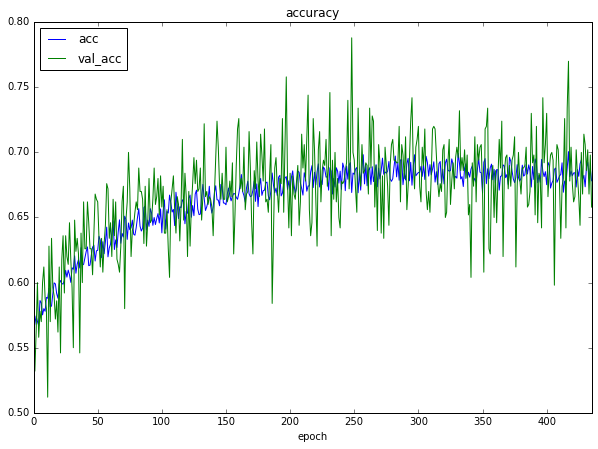

In [21]:
_ = df2[['acc','val_acc','epoch']].plot.line(x='epoch',figsize = (10,7))
_ = plt.title('accuracy')

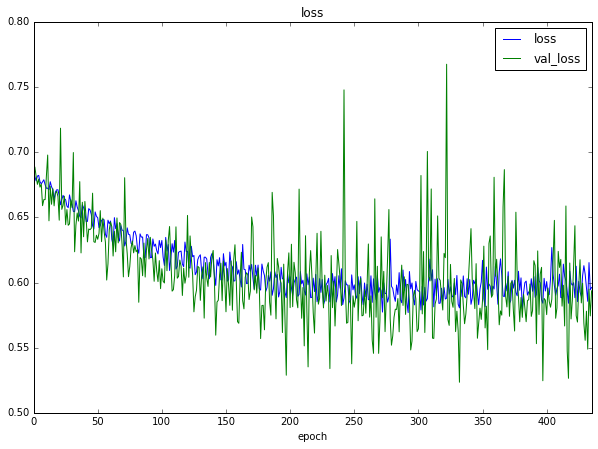

In [22]:
_ = df2[['loss','val_loss','epoch']].plot.line(x='epoch',figsize = (10,7))
_ = plt.title('loss')

In [33]:
# smoothing
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(df2['val_loss'],df2['epoch'])
df2['smoothed_v_loss'] = z[:,1]

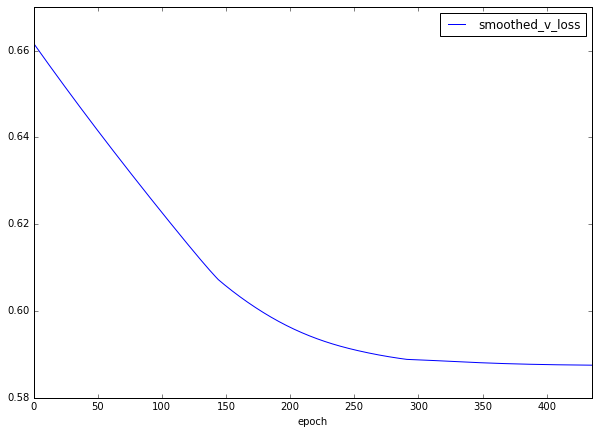

In [35]:
df2.plot.line(x='epoch',y='smoothed_v_loss',figsize=(10,7))